In [1]:
import os
import sys
# import cv2

import math

 
import time
import datetime
from datetime import timezone
 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import ccxt

import ta
import json

from utils import *  

## Auth.py

In [2]:
# Check Ip Address (Make sure this IP address is whitelisted on Binance)

print('IP Address of the Machine: ', getIP())


IP Address of the Machine:  5.151.68.41


In [3]:
exchange = log_in()
print(exchange)

Successfully logged into Binance
Binance


In [4]:
balances = pd.DataFrame(exchange.fetch_balance()['info']['balances'])
coin_balance=float(balances[balances['asset']=='USDT']['free'].values[0])
print(coin_balance)

3.0472837


In [7]:
def fetch_coin_balance(symbol:str='BTC') -> float:
    balances = pd.DataFrame(exchange.fetch_balance()['info']['balances'])
    pair_balance = float(balances[balances['asset']==symbol]['free'].values[0])
    return pair_balance

print(fetch_coin_balance(symbol='USDT'))

3.0472837


In [9]:
symbol = 'BTC/USDT'
type = 'limit'  # or 'market'
side = 'sell'  # or 'buy'
amount = 0.00008
price = 63743.04  # or None

# order = exchange.create_order(symbol, type, side, amount, price)

In [ ]:
print('Open Orders: ', pd.DataFrame(exchange.fetch_closed_orders(symbol)))

In [ ]:
# order = exchange.create_market_buy_order(symbol, amount)

In [ ]:
print('Open Orders: ', exchange.fetch_open_orders(symbol))
print('Len closed Orders: ', len(exchange.fetch_closed_orders(symbol)))
exchange.create_market_buy_order(symbol, amount)
print('Open Orders: ', exchange.fetch_open_orders(symbol))
print('closed Orders: ', exchange.fetch_closed_orders(symbol))

In [ ]:

def create_order():
    # exchange = ccxt.pro.binance({
    #     'apiKey': 'YOUR_API_KEY',
    #     'secret': 'YOUR_SECRET',
    # })

    markets = exchange.load_markets()

    # exchange.verbose = True  # uncomment for debugging purposes if necessary

    symbol = 'ETH/BTC'
    type = 'limit'  # or 'market'
    side = 'sell'  # or 'buy'
    amount = 1.0
    price = 0.060154  # or None

    order = exchange.create_order(symbol, type, side, amount, price)
    print('Open Orders: ', exchange.fetch_open_orders())
    canceled = exchange.cancel_order(order['id'], order['symbol'])
    print('Open Orders 2nd time: ', exchange.fetch_open_orders())

    print(canceled)

    exchange.close()

def main():
    create_order()
    


main()

In [ ]:
# exchange.fetch_closed_orders('BTC/USDT')

In [ ]:
days = 25 
from_timestamp = exchange.milliseconds() - days * 86400 * 1000 * 1
data = exchange.fetch_ohlcv('BTC/USDT', '1d', from_timestamp)
print(len(data))
data

In [ ]:
account_balance = pd.DataFrame(exchange.fetch_balance()['info']['balances'])
account_balance[account_balance['asset']=='USDT']

In [ ]:
account_balance.free.astype('float32').sum()

In [ ]:
exchange.positions

In [19]:
starting_usdt = 1000
starting_coin = 0
trading_fees = 0.001

In [62]:
help(exchange.fetch_ohlcv)

Help on method fetch_ohlcv in module ccxt.binance:

fetch_ohlcv(symbol: str, timeframe='1m', since: Optional[int] = None, limit: Optional[int] = None, params={}) -> List[list] method of ccxt.binance.binance instance
    fetches historical candlestick data containing the open, high, low, and close price, and the volume of a market
    :see: https://binance-docs.github.io/apidocs/spot/en/#kline-candlestick-data
    :see: https://binance-docs.github.io/apidocs/voptions/en/#kline-candlestick-data
    :see: https://binance-docs.github.io/apidocs/futures/en/#index-price-kline-candlestick-data
    :see: https://binance-docs.github.io/apidocs/futures/en/#mark-price-kline-candlestick-data
    :see: https://binance-docs.github.io/apidocs/futures/en/#kline-candlestick-data
    :see: https://binance-docs.github.io/apidocs/delivery/en/#index-price-kline-candlestick-data
    :see: https://binance-docs.github.io/apidocs/delivery/en/#mark-price-kline-candlestick-data
    :see: https://binance-docs.git

In [36]:
since = '2024-04-30T00:00:00'
if isinstance(since, str):
    since = exchange.parse8601(since)
    print(since)
    print(datetime.datetime.fromtimestamp(since/1000.0))

1714435200000
2024-04-30 01:00:00


In [43]:
class TradingBot:
    def __init__(self, exchange, name='freedom_25'):
        
        print('Hi I am Freedom  25, To your service')
        self.exchange = exchange
        self.exchange.load_markets()
        # os.system('pwd')
        
    def get_historical_prices(self, symbols:str='BTC/USDT', timeframe:str='1d', days:int = 500, start: datetime = None, end: datetime = None, save:bool=False)-> pd.DataFrame:
        from_timestamp = exchange.milliseconds() - days * 86400 * 1000
        to_timestamp = exchange.milliseconds() - (days-10) * 86400 * 1000
        # bars = exchange.fetch_ohlcv(symbols, timeframe)
        
        if days:
            print(f'Fetching past {days} days data for {symbol} || Timeframe: {timeframe}')
            bars = exchange.fetch_ohlcv(symbols, timeframe=timeframe, since=from_timestamp, limit=1000)
        
        #TODO: from-to timestamp data fetch
        if start:
            if end:
                pass
            else:
                pass
            

        # bars = exchange.fetch_ohlcv(symbols, timeframe=timeframe, since=from_timestamp,  params={'until': to_timestamp}, limit=1000)
        df = pd.DataFrame(bars[:-1], columns=['date', 'open', 'high', 'low', 'close', 'volume'])
        df['date'] = pd.to_datetime(df['date'], unit='ms')
        df['date'] = df['date'].dt.strftime('%Y-%m-%d %H:%M:%S')
        df["close"] = pd.to_numeric(df["close"])
        df["high"] = pd.to_numeric(df["high"])
        df["low"] = pd.to_numeric(df["low"])
        df["open"] = pd.to_numeric(df["open"])
        
        if save:
            filename = f'{symbol.split('/')[0]}_{symbol.split('/')[1]}_{days}_days.csv' #'test.csv'
            print(filename)
            df.to_csv(filename)
        
        return df
    
    def fetch_coin_balance(self, symbol:str='BTC') -> float:
        balances = pd.DataFrame(exchange.fetch_balance()['info']['balances'])
        pair_balance = float(balances[balances['asset']==symbol]['free'].values[0])
        return pair_balance
    
    
    
    
    def populate_indicators(self, data:pd.DataFrame):
        data['MA-st'] = ta.trend.sma_indicator(data['close'], 10)
        data['MA-lt'] = ta.trend.sma_indicator(data['close'], 40)
        data['EMAf'] = ta.trend.ema_indicator(data['close'], 10)
        data['EMAs'] = ta.trend.ema_indicator(data['close'], 30)
        data['Trend'] = ta.trend.sma_indicator(data['close'], 50)
        data['RSI'] = ta.momentum.rsi(data['close'])
        data['ATR'] = ta.volatility.average_true_range(data['high'], data['low'], data['close'], window=14)

        # MACD = ta.trend.MACD(data['close'], window_slow=26, window_fast=12, window_sign=9)
        # data['MACD'] = MACD.macd()
        # data['MACD_histo'] = MACD.macd_diff()
        # data['MACD_signal'] = MACD.macd_signal()

        # BB = ta.volatility.BollingerBands(close=data['close'], window=100, window_dev=2)
        # data["BB_lower"] = BB.bollinger_lband()
        # data["BB_upper"] = BB.bollinger_hband()
        # data["BB_avg"] = BB.bollinger_mavg()
        return data
    
     
    def plot_data(self, dataframe:pd.DataFrame):
        pass
    
    def create_trade(self):
        pass
    
    def execute_signals(self):
        pass
    
    def execute_trades(self):
        pass
    
    def run(self):
        df = self.get_historical_prices(symbols='BTC/USDT', timeframe='1d', days=500)
        print(df.head())
        print(df.tail())
        signal_df = self.populate_indicators(df)
        print(signal_df.tail()) 
        return signal_df
    
    
   

In [44]:
def main():
    bot = TradingBot(exchange=exchange)
    signal_df = bot.run() 
    return signal_df
    

signal_df = main()   

Hi I am Freedom  25, To your service
Fetching past 500 days data for BTC/USDT || Timeframe: 1d
                  date      open      high       low     close        volume
0  2022-12-18 00:00:00  16777.54  16863.26  16663.07  16738.21  112619.31646
1  2022-12-19 00:00:00  16739.00  16815.99  16256.30  16438.88  179094.28305
2  2022-12-20 00:00:00  16438.88  17061.27  16397.20  16895.56  248808.92324
3  2022-12-21 00:00:00  16896.15  16925.00  16723.00  16824.67  156810.96362
4  2022-12-22 00:00:00  16824.68  16868.52  16559.85  16821.43  176044.27235
                    date      open      high       low     close       volume
494  2024-04-25 00:00:00  64289.58  65297.94  62794.00  64498.34  31341.46338
495  2024-04-26 00:00:00  64498.33  64820.01  63297.48  63770.01  27085.19346
496  2024-04-27 00:00:00  63770.00  63923.41  62391.24  63461.98  20933.06052
497  2024-04-28 00:00:00  63461.98  64370.00  62781.00  63118.62  16949.20005
498  2024-04-29 00:00:00  63118.62  64228.35  61765.5

In [82]:
def buy_condition(row):
        if row['MA-st'] > row['MA-lt']:
            return True
        else:
            return False
        
    #     return row['MA-st'] > row['MA-lt']:

def sell_condition(row):
    if row['MA-st'] < row['MA-lt']:
        return True
    else:
        return False

In [6]:
def calculate_position_size(balance, exposure, entry_price, stop_loss_price):
    if exposure == 'all':
        return balance
    risked_amount = balance * (exposure / 100)
    position = risked_amount * entry_price / abs(entry_price - stop_loss_price)
    return min(balance, position)

calculate_position_size(1000, 10, 10, 8)

500.0

## Complete Backtest

## Asset

In [ ]:
name_base = "BTC"
name_quote = "USDT"

### Data

In [ ]:
timeframe = "1d"
starting_date_backtest = "01 january 2019"
ending_date_backtest =  "01 january 2022"
starting_date_dl = "01 january 2018"
ending_date_dl = "01 january 2022"

### Portfolio

In [ ]:
initial_capital = 1000 # in quote
exposure = 2           # position size in percent
# exposure = 'all'       # use this instead if you want 100% of your portfolio to be used for each trade
trade_fees = 0.1       # in percent
leverage = 5

### ignores

In [ ]:
ignore_shorts = False
ignore_longs = False

ignore_tp = False
ignore_sl = False
ignore_exit = False

### Existing Data

In [46]:
data_dl = pd.read_csv('BTC_USDT_500_days.csv')
data_dl.head()

,Unnamed: 0,date,open,high,low,close,volume
0,0,2022-12-18 00:00:00,16777.54,16863.26,16663.07,16738.21,112619.31646
1,1,2022-12-19 00:00:00,16739.00,16815.99,16256.30,16438.88,179094.28305
2,2,2022-12-20 00:00:00,16438.88,17061.27,16397.20,16895.56,248808.92324
3,3,2022-12-21 00:00:00,16896.15,16925.00,16723.00,16824.67,156810.96362
4,4,2022-12-22 00:00:00,16824.68,16868.52,16559.85,16821.43,176044.27235


### Core Functions

In [ ]:
def calculate_position_size(balance, exposure, entry_price, stop_loss_price):
    if exposure == 'all':
        return balance
    risked_amount = balance * (exposure / 100)
    position = risked_amount * entry_price / abs(entry_price - stop_loss_price)
    return min(balance, position)


def calculate_liquidation_price(price, leverage, order_type):
        if order_type == 'long':
            return price * (1 - 1 / leverage)
        elif order_type == 'short':
            return price * (1 + 1 / leverage)


def calculate_pnl(entry_price, exit_price, quantity, order_type):
    if order_type == 'long':
        return (exit_price - entry_price) * quantity
    elif order_type == 'short':
        return (entry_price - exit_price) * quantity
    

def record_order(timestamp, type, price, amount, pnl, wallet, fee, orders):
    order = {
        'timestamp': timestamp,
        'type': type,
        'amount': amount,
        'fee': fee,
        'pnl': pnl,
        'wallet': wallet,
    }
    orders.append(order)
    print(f"{type} at {price} {name_quote} on {timestamp}, amount = {round(amount,2)} {name_quote}, pnl = {round(pnl,2)} {name_quote}, wallet = {round(wallet,2)} {name_quote}")

### Longs

In [ ]:
def check_long_entry_condition(row, previous_row):
    return row['close'] > row['Trend'] and row['EMAf'] > row['EMAs'] and previous_row['EMAf'] < previous_row['EMAs'] and row['RSI'] < 70


def check_long_exit_condition(row, previous_row):
    return row['EMAf'] < row['EMAs'] and previous_row['EMAf'] > previous_row['EMAs']


def compute_long_sl_level(row, entry_price):
    return entry_price - 2 * row['ATR']


def compute_long_tp_level(row, entry_price, stop_loss_price):
    risk_reward_ratio = 4
    return entry_price * (1 + risk_reward_ratio * (1 - stop_loss_price / entry_price))
    # return row['open'] * 1.1

### Shorts

In [ ]:
def check_short_entry_condition(row, previous_row):
    return row['close'] < row['Trend'] and row['EMAf'] < row['EMAs'] and previous_row['EMAf'] > previous_row['EMAs'] and row['RSI'] > 30


def check_short_exit_condition(row, previous_row):
    return row['EMAf'] > row['EMAs'] and previous_row['EMAf'] < previous_row['EMAs']


def compute_short_sl_level(row, entry_price):
    return entry_price + 2 * row['ATR']


def compute_short_tp_level(row, entry_price, stop_loss_price):
    risk_reward_ratio = 4
    return entry_price * (1 - risk_reward_ratio * (stop_loss_price / entry_price - 1))

In [ ]:
def run_backtest(data):

    # Initialize variables
    orders = []
    order_in_progress = None
    last_ath = 0
    sl_price = 0
    tp_price = 0
    long_liquidation_price = 0
    short_liquidation_price = 1e10
    wallet = initial_capital
    data['realised_pnl'] = ''
    data['unrealised_pnl'] = ''
    data['hodl'] = ''
    data['drawdown'] = ''
    previous_row = data.iloc[0]


    # Go through data and make trades
    for index, row in data.iterrows():
        price = row['close']


        # check if it is time to close a long
        if order_in_progress == 'long' and not ignore_longs:
            if row['low'] < long_liquidation_price:
                print(f' /!\ Your long was liquidated on the {row["timestamp"]} (price = {long_liquidation_price} {name_quote})')
                sys.exit()

            elif not ignore_sl and row['low'] <= sl_price:
                pnl = calculate_pnl(entry_price, sl_price, quantity, order_in_progress)
                fee_exit = quantity * sl_price * trade_fees / 100
                wallet += position - fee_entry + pnl - fee_exit
                record_order(row['timestamp'], 'long sl', sl_price, 0, pnl - fee_exit - fee_entry, wallet, fee_exit, orders)
                order_in_progress = None

            elif not ignore_tp and row['high'] >= tp_price:
                pnl = calculate_pnl(entry_price, tp_price, quantity, order_in_progress)
                fee_exit = quantity * tp_price * trade_fees / 100
                wallet += position - fee_entry + pnl - fee_exit
                record_order(row['timestamp'], 'long tp', tp_price, 0, pnl - fee_exit - fee_entry, wallet, fee_exit, orders)
                order_in_progress = None

            elif not ignore_exit and check_long_exit_condition(row, previous_row):
                pnl = calculate_pnl(entry_price, price, quantity, order_in_progress)
                fee_exit = quantity * price * trade_fees / 100
                wallet += position - fee_entry + pnl - fee_exit
                record_order(row['timestamp'], 'long exit', price, 0, pnl - fee_exit - fee_entry, wallet, fee_exit, orders)
                order_in_progress = None

            if wallet > last_ath:
                last_ath = wallet


        # check if it is time to close a short
        elif order_in_progress == 'short' and not ignore_shorts:
            if row['high'] > short_liquidation_price:
                print(f' /!\ Your short was liquidated on the {row["timestamp"]} (price = {short_liquidation_price} {name_quote})')
                sys.exit()

            elif not ignore_sl and row['high'] >= sl_price:
                pnl = calculate_pnl(entry_price, sl_price, quantity, order_in_progress)
                fee_exit = quantity * sl_price * trade_fees / 100
                wallet += position - fee_entry + pnl - fee_exit
                record_order(row['timestamp'], 'short sl', sl_price, 0, pnl - fee_exit - fee_entry, wallet, fee_exit, orders)
                order_in_progress = None

            elif not ignore_tp and row['low'] <= tp_price:
                pnl = calculate_pnl(entry_price, tp_price, quantity, order_in_progress)
                fee_exit = quantity * tp_price * trade_fees / 100
                wallet += position - fee_entry + pnl - fee_exit
                record_order(row['timestamp'], 'short tp', tp_price, 0, pnl - fee_exit - fee_entry, wallet, fee_exit, orders)
                order_in_progress = None

            elif not ignore_exit and check_short_exit_condition(row, previous_row):
                pnl = calculate_pnl(entry_price, price, quantity, order_in_progress)
                fee_exit = quantity * price * trade_fees / 100
                wallet += position - fee_entry + pnl - fee_exit
                record_order(row['timestamp'], 'short exit', price, 0, pnl - fee_exit - fee_entry, wallet, fee_exit, orders)
                order_in_progress = None

            if wallet > last_ath:
                last_ath = wallet


        # check it is time to enter a long
        if not ignore_longs and order_in_progress == None:
            if check_long_entry_condition(row, previous_row):
                order_in_progress = 'long'
                if not ignore_sl:
                    sl_price = compute_long_sl_level(row, price)
                if not ignore_tp:
                    tp_price = compute_long_tp_level(row, price, sl_price)
                entry_price = price
                position = calculate_position_size(wallet, exposure, price, sl_price)
                amount = position * leverage
                fee_entry = amount * trade_fees / 100
                quantity = (amount - fee_entry) / price
                long_liquidation_price = calculate_liquidation_price(price, leverage, order_in_progress)
                if wallet > last_ath:
                    last_ath = wallet

                wallet -= position
                record_order(row['timestamp'], 'long entry', price, amount-fee_entry, -fee_entry, wallet, fee_entry, orders)


        # check if it is time to enter a short
        if not ignore_shorts and order_in_progress == None:
            if check_short_entry_condition(row, previous_row):
                order_in_progress = 'short'
                if not ignore_sl:
                    sl_price = compute_short_sl_level(row, price)
                if not ignore_tp:
                    tp_price = compute_short_tp_level(row, price, sl_price)
                entry_price = price
                position = calculate_position_size(wallet, exposure, price, sl_price)
                amount = position * leverage
                fee_entry = amount * trade_fees / 100
                quantity = (amount - fee_entry) / price
                short_liquidation_price = calculate_liquidation_price(price, leverage, order_in_progress)
                wallet -= position
                record_order(row['timestamp'], 'short entry', price, amount-fee_entry, -fee_entry, wallet, fee_entry, orders)


        # updating wallet info
        data.at[index, 'realised_pnl'] = wallet
        data.at[index, 'unrealised_pnl'] = data.at[index, 'realised_pnl']
        if order_in_progress != None:
            data.at[index, 'unrealised_pnl'] += position + calculate_pnl(entry_price, price, quantity, order_in_progress) #- fee
        data.at[index, 'hodl'] = initial_capital / data["close"].iloc[0] * price
        data.at[index, 'drawdown'] = (data.at[index, 'unrealised_pnl'] - last_ath) / last_ath if last_ath else 0

        previous_row = row

    return data, orders

## Backtest Loop

In [84]:
symbol = 'BTC/USDT'
data=signal_df

usdt = starting_usdt
coin = starting_coin
trades = []
wallet = []
buyhold = []


for index, row in data.iterrows():

    value = row['close']

    if buy_condition(row) and usdt > 0:
        coin = usdt / value
        coin = coin * (1 - trading_fees)
#         coin *= 1 - trade_fees
        usdt = 0
        trades.append({'date':index, 'side':'buy', 'price':value, 'coin':coin, 'usdt':usdt, 'wallet':coin*value})
        print(f"Bought {symbol} at {value}$ on the {index}")

    if sell_condition(row) and coin > 0: 
        usdt = coin *  value
        usdt = usdt * (1 - trading_fees)
        coin = 0
        trades.append({'date':index, 'side':'sell', 'price':value, 'coin':coin, 'usdt':usdt, 'wallet':usdt})
        print(f"Sold {symbol} at {value}$ on the {index}")

    if usdt == 0:
        wallet.append(coin * value)
    else:
        wallet.append(usdt)

    buyhold.append(starting_usdt / data["close"].iloc[0] * value)

Bought BTC/USDT at 23060.94$ on the 39
Sold BTC/USDT at 22430.24$ on the 78
Bought BTC/USDT at 26907.49$ on the 91
Sold BTC/USDT at 28415.29$ on the 130
Bought BTC/USDT at 29026.16$ on the 137
Sold BTC/USDT at 27668.79$ on the 142
Bought BTC/USDT at 29884.92$ on the 187
Sold BTC/USDT at 29228.91$ on the 220
Bought BTC/USDT at 26568.08$ on the 278
Sold BTC/USDT at 41659.03$ on the 398
Bought BTC/USDT at 44349.6$ on the 417
Sold BTC/USDT at 63419.99$ on the 485


In [86]:
trades = pd.DataFrame(trades, columns = ['date', 'side', 'price', 'coin', 'usdt', 'wallet'])
trades = trades.round(2) #round numbers
trades

,date,side,price,coin,usdt,wallet
0,39,buy,23060.94,0.04,0.00,999.00
1,78,sell,22430.24,0.00,970.71,970.71
2,91,buy,26907.49,0.04,0.00,969.74
3,130,sell,28415.29,0.00,1023.05,1023.05
4,137,buy,29026.16,0.04,0.00,1022.03
5,142,sell,27668.79,0.00,973.26,973.26
6,187,buy,29884.92,0.03,0.00,972.29
7,220,sell,29228.91,0.00,949.99,949.99
8,278,buy,26568.08,0.04,0.00,949.04
9,398,sell,41659.03,0.00,1486.62,1486.62


In [87]:
trades['side'].value_counts()

side
buy     6
sell    6
Name: count, dtype: int64

<Axes: >

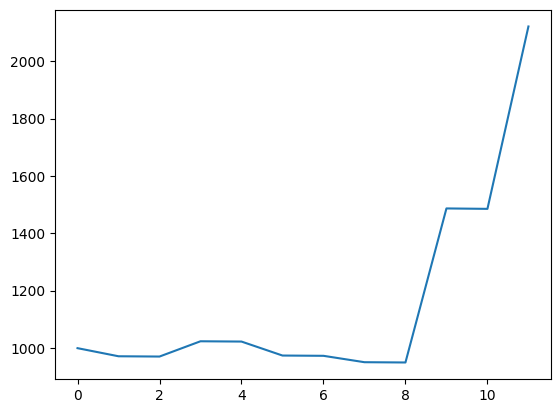

In [89]:
trades.wallet.plot()


Starting amount: 1,000.00 USDT
Buy-Hold: 	 3,762.32 USDT	 (276.23% profit)
2-SMA: 		 2,121.62 USDT	 (112.16% profit)


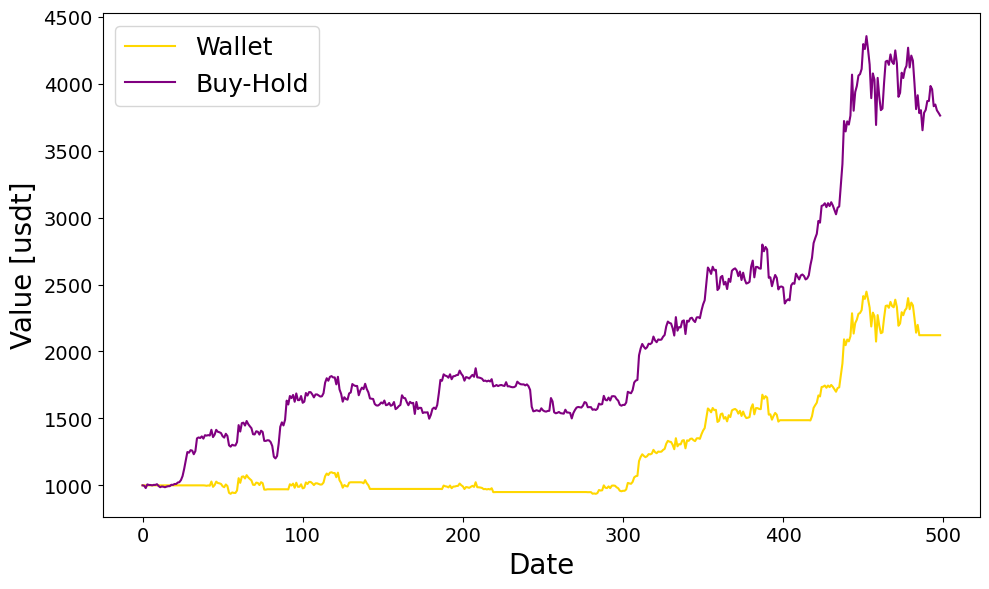

In [88]:
print(
    "\nStarting amount: %s USDT"
    % (
        "{:0,.2f}".format(starting_usdt),

    )
)
print(
    "Buy-Hold: \t %s USDT\t (%s%% profit)"
    % (
        "{:0,.2f}".format(buyhold[-1]),
        "{:0,.2f}".format((buyhold[-1] / starting_usdt - 1) * 100),
    )
)
print(
    "2-SMA: \t\t %s USDT\t (%s%% profit)"
    % (
        "{:0,.2f}".format(wallet[-1]),
        "{:0,.2f}".format((wallet[-1] / starting_usdt - 1) * 100),
    )
)

plt.figure(figsize=(10, 6))
plt.plot(
    data.index,
    wallet,
    label="Wallet",
    color="gold",
)
plt.plot(
    data.index,
    buyhold,
    label="Buy-Hold",
    color="purple",
)
plt.legend(fontsize=18, loc="upper left")
plt.ylabel("Value [usdt]", fontsize=20)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=20)
plt.xticks(fontsize=14)
plt.tight_layout()

In [ ]:
def run_bot():
    print(f"Fetching new bars for {datetime.datetime.now().isoformat()}")
    bars = exchange.fetch_ohlcv('ETH/USDT', timeframe='1m', limit=100)
    df = pd.DataFrame(bars[:-1], columns=['date', 'open', 'high', 'low', 'close', 'volume'])
    df['date'] = pd.to_datetime(df['date'], unit='ms')

    df['date'] = df['date'].dt.strftime('%Y-%m-%d %H:%M:%S')
    return df

run_bot()

In [ ]:
# -*- coding: utf-8 -*-

import os
import sys
# import asciichart

import ccxt  # noqa: E402
binance = ccxt.binance()
symbol = 'BTC/USDT'
timeframe = '1h'

# each ohlcv candle is a list of [ timestamp, open, high, low, close, volume ]
index = 4  # use close price from each ohlcv candle

height = 15
length = 80


def print_chart(exchange, symbol, timeframe):

   print("\n" + exchange.name + ' ' + symbol + ' ' + timeframe + ' chart:')

   # get a list of ohlcv candles
   ohlcv = exchange.fetch_ohlcv(symbol, timeframe)

   # get the ohlCv (closing price, index == 4)
   series = [x[index] for x in ohlcv]

   # print the chart
#    print("\n" + asciichart.plot(series[-length:], {'height': height}))  # print the chart

   last = ohlcv[len(ohlcv) - 1][index]  # last closing price
   return last


last = print_chart(binance, symbol, timeframe)
print("\n" + binance.name + " ₿ = $" + str(last) + "\n")  # print last closing price
